In [2]:
import numpy as np
from bokeh.plotting import figure, show, gridplot
from bokeh.io import output_notebook
import bokeh.models as bm


In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
x = np.linspace(0, 2 * np.pi, 1024)
y = np.cos(x)
fig = figure(title="simple line example", x_axis_label="x", y_axis_label="y")
fig.line(x, y, legend="cos(x)", color="red", line_width=2)
fig.plot_width=1000
#fig.plot_height=200
show(fig)

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

y0 = np.cos(x)

y1 = np.sin(x)

mySource = bm.ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

myTools = "box_select,lasso_select,help"

left = figure(tools=myTools, width=300, height=300, title="Left")

left.circle('x', 'y0', source=mySource)

right = figure(tools=myTools, width=300, height=300, title="Right")
right.circle('x', 'y1', source=mySource)
p = gridplot([[left, right]])

show(p)


In [5]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]


# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

In [6]:
from bokeh.io import output_file, show
from bokeh.layouts import column
from bokeh.plotting import figure

#output_file("layout.html")

x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put the results in a column and show
p = column(s1, s2,s3)
show(p)


In [7]:
import pandas as pd
from bokeh.charts import output_file, Chord
from bokeh.io import show
from bokeh.sampledata.les_mis import data

nodes = data['nodes']
links = data['links']

nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)

source_data = links_df.merge(nodes_df, how='left', left_on='source', right_index=True)
source_data = source_data.merge(nodes_df, how='left', left_on='target', right_index=True)
source_data = source_data[source_data["value"] > 5]

chord_from_df = Chord(source_data, source="name_x", target="name_y", value="value")
output_file('chord_from_df.html', mode="inline")
show(chord_from_df)


In [8]:
import seaborn as sns

from bokeh import mpl
from bokeh.plotting import output_file, show

tips = sns.load_dataset("tips")

sns.set_style("whitegrid")

# ax = sns.violinplot(x="size", y="tip", data=tips.sort("size"))
# ax = sns.violinplot(x="size", y="tip", data=tips,
#                     order=np.arange(1, 7), palette="Blues_d")
# ax = sns.violinplot(x="day", y="total_bill", hue="sex",
#                     data=tips, palette="Set2", split=True,
#                     scale="count")
ax = sns.violinplot(x="day", y="total_bill", hue="sex",
                    data=tips, palette="Set2", split=True,
                    scale="count", inner="stick")
# ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
#                     data=tips, palette="muted", split=True)
# ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
#                     data=tips, palette="muted")

# planets = sns.load_dataset("planets")
# ax = sns.violinplot(x="orbital_period", y="method",
#                     data=planets[planets.orbital_period < 1000],
#                     scale="width", palette="Set3")

output_file("seaborn_violin.html", title="seaborn_violin.py example")

show(mpl.to_bokeh())

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/neylemke/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/lib/python3.5/dist-packages/bokeh/core/compat/bokeh_renderer.py:252: UserWarning: Path drawing has performance issues, please use mpl PathCollection instead
  warnings.warn("Path draw

In [9]:
from __future__ import print_function

import numpy as np
import pandas as pd

from bokeh.util.browser import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle, Line
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Range1d
from bokeh.resources import INLINE

raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]]

quartet = pd.DataFrame(data=raw_columns, columns=
                       ['Ix','Iy','IIx','IIy','IIIx','IIIy','IVx','IVy'])


circles_source = ColumnDataSource(
    data = dict(
        xi   = quartet['Ix'],
        yi   = quartet['Iy'],
        xii  = quartet['IIx'],
        yii  = quartet['IIy'],
        xiii = quartet['IIIx'],
        yiii = quartet['IIIy'],
        xiv  = quartet['IVx'],
        yiv  = quartet['IVy'],
    )
   )

x = np.linspace(-0.5, 20.5, 10)
y = 3 + 0.5 * x
lines_source = ColumnDataSource(data=dict(x=x, y=y))

xdr = Range1d(start=-0.5, end=20.5)
ydr = Range1d(start=-0.5, end=20.5)

def make_plot(title, xname, yname):
    plot = Plot(x_range=xdr, y_range=ydr, plot_width=400, plot_height=400,
                border_fill_color='white', background_fill_color='#e9e0db')
    plot.title.text = title

    xaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(xaxis, 'below')

    yaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(yaxis, 'left')

    plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
    plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

    line = Line(x='x', y='y', line_color="#666699", line_width=2)
    plot.add_glyph(lines_source, line)

    circle = Circle(
        x=xname, y=yname, size=12,
        fill_color="#cc6633", line_color="#cc6633", fill_alpha=0.5
    )
    plot.add_glyph(circles_source, circle)

    return plot

#where will this comment show up
I   = make_plot('I',   'xi',   'yi')
II  = make_plot('II',  'xii',  'yii')
III = make_plot('III', 'xiii', 'yiii')
IV  = make_plot('IV',  'xiv',  'yiv')

grid = gridplot([[I, II], [III, IV]], toolbar_location=None)

doc = Document()
doc.add_root(grid)

if __name__ == "__main__":
    doc.validate()
    filename = "anscombe.html"
    with open(filename, "w") as f:
        f.write(file_html(doc, INLINE, "Anscombe's Quartet"))
    print("Wrote %s" % filename)
    view(filename)


Wrote anscombe.html


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import optimize

from bokeh import mpl
from bokeh.plotting import output_file, show

# Set the palette colors.
sns.set(palette="Set2")

# Build the sin wave
def sine_wave(n_x, obs_err_sd=1.5, tp_err_sd=.3):
    x = np.linspace(0, (n_x - 1) / 2, n_x)
    y = np.sin(x) + np.random.normal(0, obs_err_sd) + np.random.normal(0, tp_err_sd, n_x)
    return y

sines = np.array([sine_wave(31) for _ in range(20)])

# Generate the Seaborn plot with "ci" bars.
ax = sns.tsplot(sines, err_style="ci_bars", interpolate=False)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, sines.shape[1])
out, _ = optimize.leastsq(lambda p: sines.mean(0) - (np.sin(x / p[1]) + p[0]), (0, 2))
a, b = out
xx = np.linspace(xmin, xmax, 100)
plt.plot(xx, np.sin(xx / b) + a, c="#444444")

plt.title("Seaborn tsplot with CI in bokeh.")

output_file("seaborn_errorbar.html", title="seaborn_errorbar.py example")

show(mpl.to_bokeh())

In [11]:
import seaborn as sns
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
plt=sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)


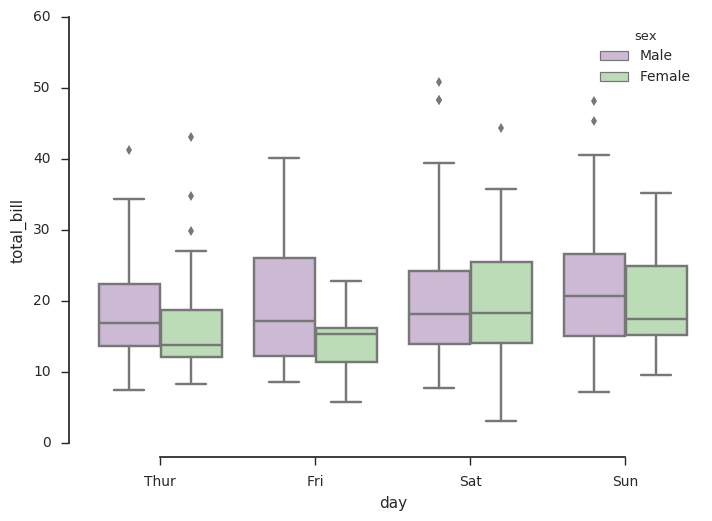

In [12]:
sns.plt.show()